In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
### Read the dataset

In [3]:
data = pd.read_csv('./../dataset/spam.csv', encoding='latin')
data.rename(columns={'v1' : 'label', 'v2' : 'message'}, inplace=True)
data

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
# row  ->  5572 & columns  ->  5
data.shape

(5572, 5)

In [5]:
print(f"Percentage of Ham messages :- {((data['label'].value_counts()[0] / data.shape[0]) * 100):.2f}%")
print()
print(f"Percentage of Ham messages :- {((data['label'].value_counts()[1] / data.shape[0]) * 100):.2f}%")

Percentage of Ham messages :- 86.59%

Percentage of Ham messages :- 13.41%


In [6]:
# lets get a quick info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       5572 non-null   object
 1   message     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# check for missing values in dataset
data.isnull().sum()

label            0
message          0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
# columns "Unnamed: 2", "Unnamed: 3", "Unnamed: 4" has more than 70% of missing values.
# that's why we need to remove those columns from dataset

data.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [9]:
data.shape

(5572, 2)

In [10]:
# check for duplicate rows
data.duplicated().sum()

403

In [11]:
# 403 duplicate rows so we need to remove them
data.drop_duplicates(inplace=True, ignore_index=True)

In [12]:
data.shape

(5169, 2)

In [13]:
data.nunique()

label         2
message    5169
dtype: int64

In [14]:
# check total number of spam and ham emails
data['label'].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

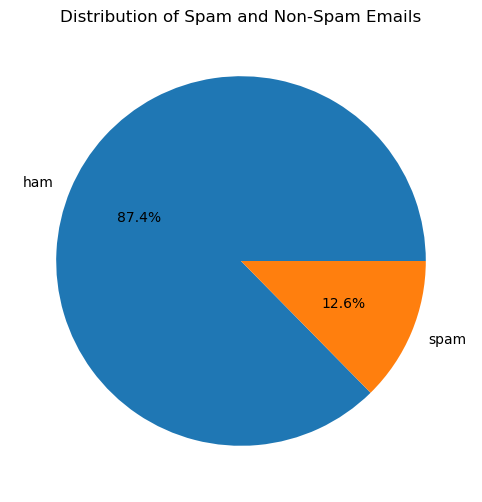

In [15]:
# Plotting Distribution of Spam and Non-Spam Emails
plt.figure(figsize=(8, 6))
plt.pie(data['label'].value_counts(), labels=data['label'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Spam and Non-Spam Emails')
plt.show()

In [16]:
# As per the above Visualization about the Distribution of Spam and Non-Spam Emails
# we can our dataset has 87.4% ham and 12.6% spam emails

In [17]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/amarprajapat/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
## lets create some numeric columns with the help of message column to get insight

In [19]:
# create a column  "num_of_char"  which stores the total number of characters available in a particular message
data['num_of_char'] = data['message'].apply(len)

In [20]:
# create a column  "num_of_words"  which stores the total number of words available in a particular message
data['num_of_words'] = data['message'].apply(lambda x: len(word_tokenize(x)))

In [21]:
# create a column  "num_of_sentence"  which stores the total number of sentence available in a particular message
data['num_of_sentence'] = data['message'].apply(lambda x: len(sent_tokenize(x)))

In [22]:
# lets check how data looks like
data

,label,message,num_of_char,num_of_words,num_of_sentence
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5164,spam,This is the 2nd time we have tried 2 contact u...,161,35,4
5165,ham,Will Ì_ b going to esplanade fr home?,37,9,1
5166,ham,"Pity, * was in mood for that. So...any other s...",57,15,2
5167,ham,The guy did some bitching but I acted like i'd...,125,27,1


In [23]:
# lets get the numeric summary about the message(both ham and spam included) with the help of num_of_char, num_of_words and num_of_sentence columns
data.describe()

,num_of_char,num_of_words,num_of_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
# lets get the numeric summary about the ham message with the help of num_of_char, num_of_words and num_of_sentence columns
data[data['label'] == 'ham'].describe()

,num_of_char,num_of_words,num_of_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
# lets get the numeric summary about the spam message with the help of num_of_char, num_of_words and num_of_sentence columns
data[data['label'] == 'spam'].describe()

,num_of_char,num_of_words,num_of_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [26]:
# lets find out Average length of spam & ham messages
avg_len_spam = data[data['label'] == 'spam']['num_of_char'].mean()
avg_len_ham = data[data['label'] == 'ham']['num_of_char'].mean()

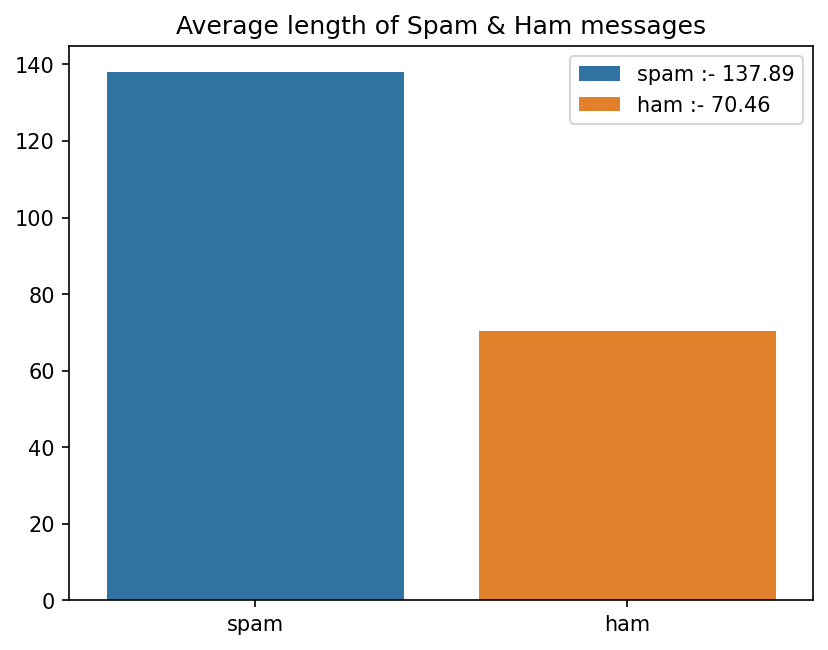

In [27]:
# lets visualize Average length of spam & ham messages
plt.figure(dpi=150)
sns.barplot(x=['spam', 'ham'], y=[avg_len_spam, avg_len_ham], hue=[f"spam :- {avg_len_spam:.2f}", f'ham :- {avg_len_ham:.2f}'])
plt.title("Average length of Spam & Ham messages")
plt.show()

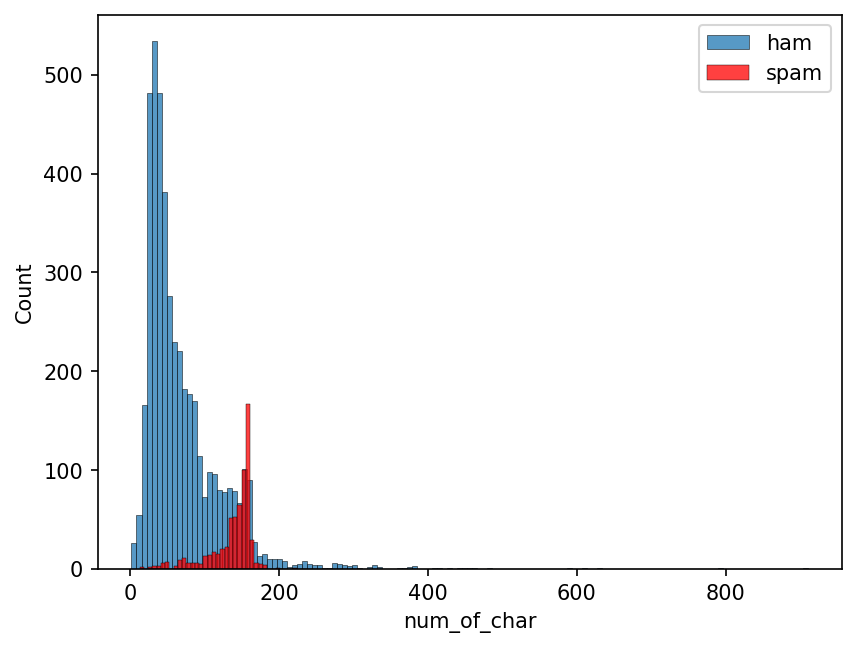

In [28]:
# lets visualize distribution of spam & ham messages lenght
plt.figure(dpi=150)
sns.histplot(data[data['label'] == 'ham']['num_of_char'], label='ham')
sns.histplot(data[data['label'] == 'spam']['num_of_char'], color='red', label='spam')
plt.legend()
plt.show()

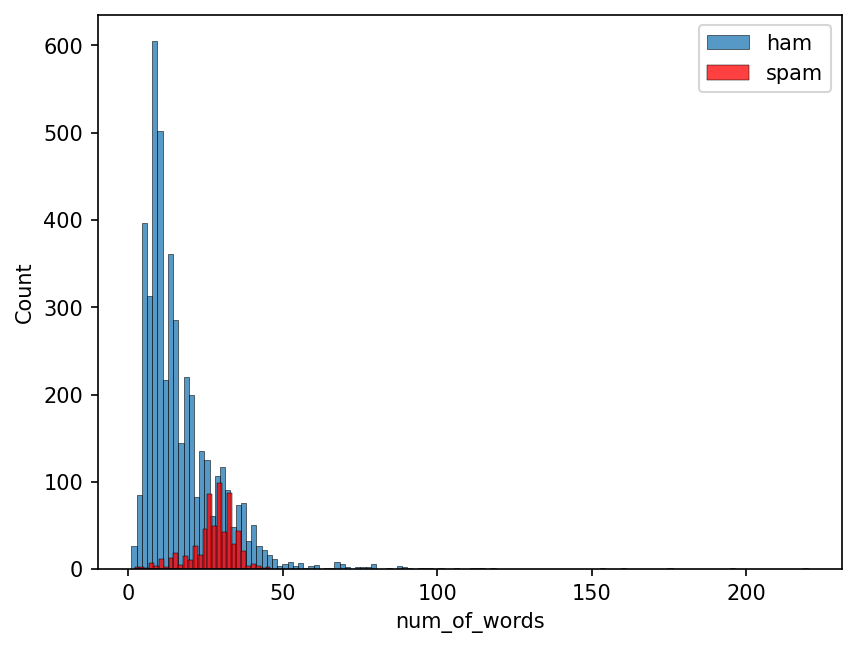

In [29]:
# lets visualize distribution of spam & ham messages based on number of words in the messages
plt.figure(dpi=150)
sns.histplot(data[data['label'] == 'ham']['num_of_words'], label='ham')
sns.histplot(data[data['label'] == 'spam']['num_of_words'], color='red', label='spam')
plt.legend()
plt.show()

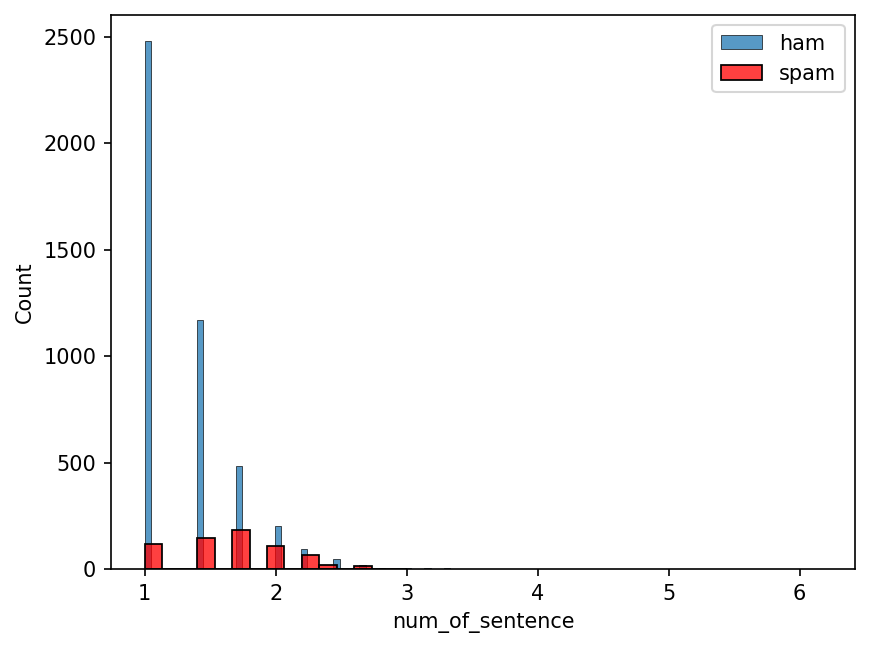

In [34]:
# lets visualize distribution of spam & ham messages based on number of sentences in the messages
plt.figure(dpi=150)
sns.histplot(data[data['label'] == 'ham']['num_of_sentence']**0.5, label='ham')
sns.histplot(data[data['label'] == 'spam']['num_of_sentence']**0.5, color='red', label='spam')
plt.legend()
plt.show()

<Figure size 960x720 with 0 Axes>

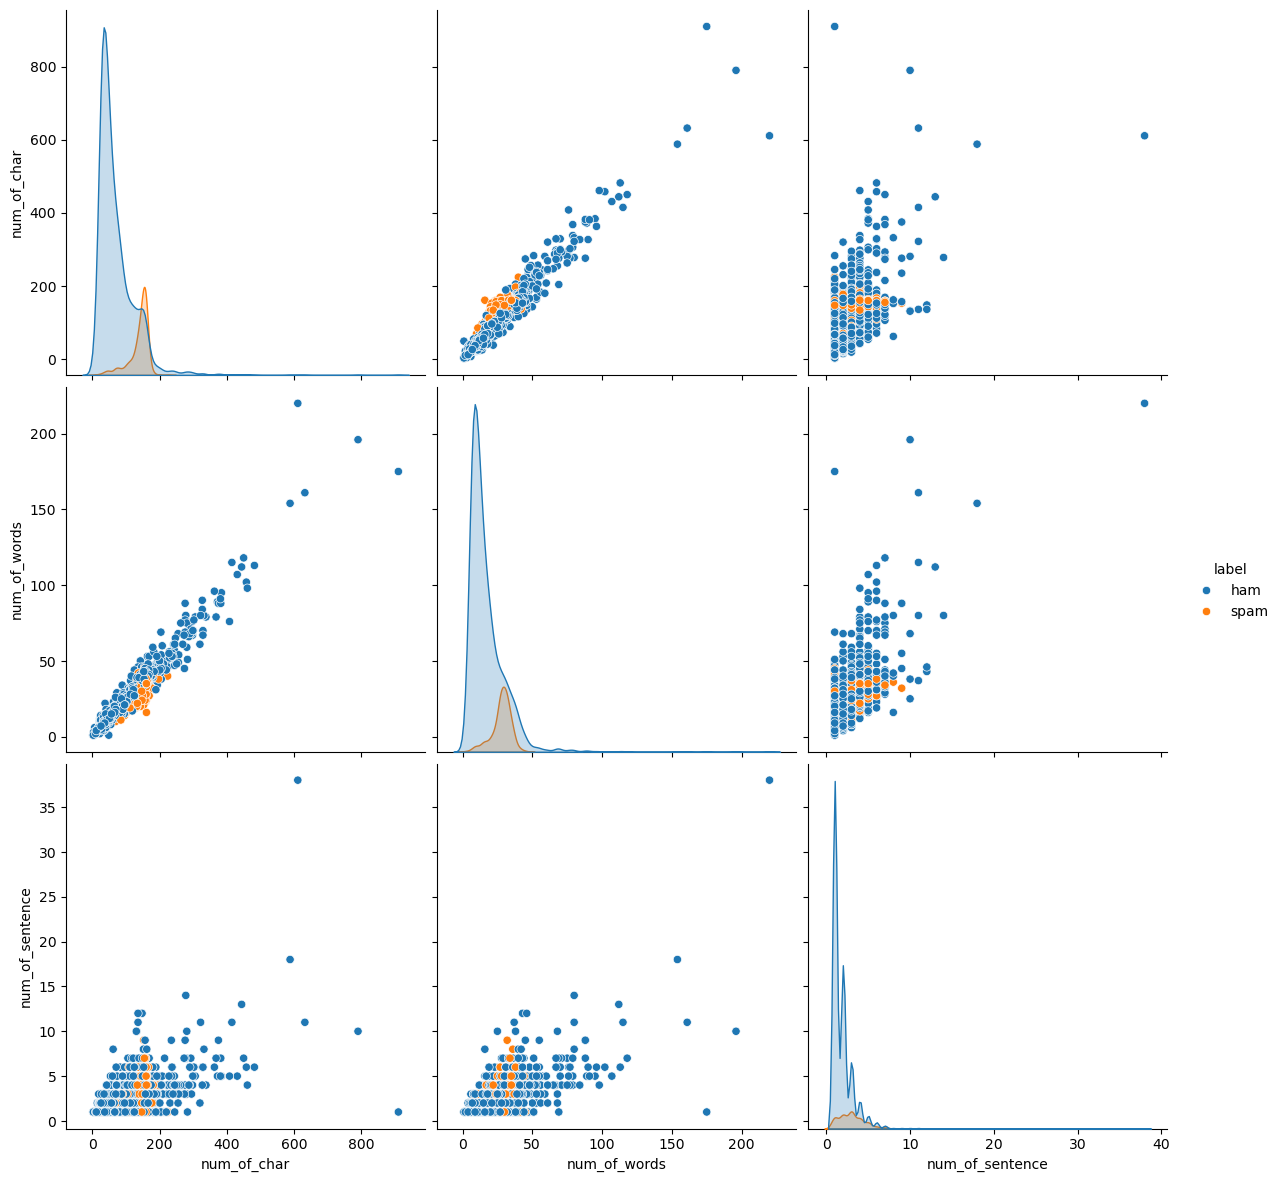

In [36]:
# lets visualize relationships and distributions between newly created numerical variables
plt.figure(dpi=150)
sns.pairplot(data, hue='label',height=4)
plt.show()

In [37]:
raw = ''.join(data['message'].str.lower().values)
raw_word_count_series = pd.Series(raw.split()).value_counts()
raw_word_count_series

to               2049
i                1742
you              1689
a                1266
the              1191
                 ... 
lefti               1
lim                 1
player.aight,       1
down?wat            1
freerofl.           1
Name: count, Length: 16125, dtype: int64

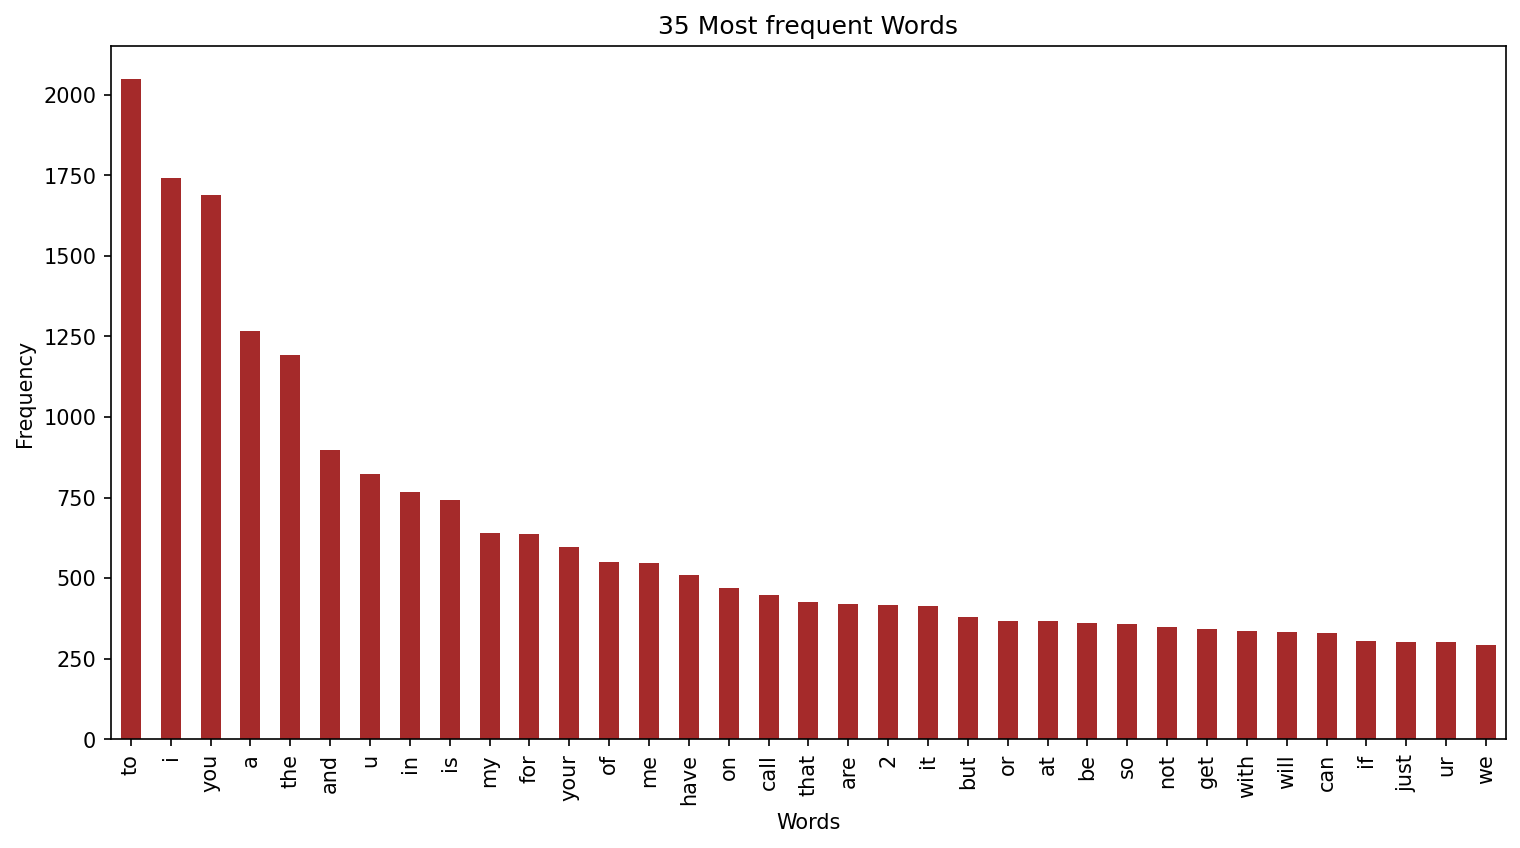

In [38]:
# lets see and visualize some most frequent words in whole messages
plt.figure(figsize=(12,6),dpi=150)
raw_word_count_series[:35].plot(kind='bar', color='brown')
plt.title("35 Most frequent Words")
plt.xlabel("Words")
plt.ylabel('Frequency')
plt.show()

In [39]:
# as per the above graph we can say that messages contains a lot of stopwords and their frequency is more than 2000

In [40]:
data.head()

,label,message,num_of_char,num_of_words,num_of_sentence
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [41]:
# now we don't need num_of_char, num_of_words, num_of_sentence columns
# lets drop them
data.drop(columns=["num_of_char", "num_of_words", "num_of_sentence"], inplace=True)

In [42]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [43]:
label_group = data.groupby(['label'])

In [44]:
ham_data = label_group.get_group("ham")
ham_data

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
5162,ham,Huh y lei...
5165,ham,Will Ì_ b going to esplanade fr home?
5166,ham,"Pity, * was in mood for that. So...any other s..."
5167,ham,The guy did some bitching but I acted like i'd...


In [45]:
spam_data = label_group.get_group("spam")
spam_data

,label,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5137,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5139,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5146,spam,Had your contract mobile 11 Mnths? Latest Moto...
5163,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [46]:
# store the words with their count based on different labels(spam, ham)
ham_series = pd.Series([word for doc in ham_data['message'].values for word in doc.split()]).value_counts()
spam_series = pd.Series([word for doc in spam_data['message'].values for word in doc.split()]).value_counts()

In [47]:
ham_series

to       1450
you      1412
I        1349
the       954
a         884
         ... 
\Are        1
Yeah.       1
on!         1
4.15        1
Rofl.       1
Name: count, Length: 12479, dtype: int64

In [48]:
spam_series

to                 522
a                  314
your               171
call               163
the                160
                  ... 
draw.....Please      1
telephone            1
09041940223          1
29/03/05             1
NOW1!                1
Name: count, Length: 4312, dtype: int64

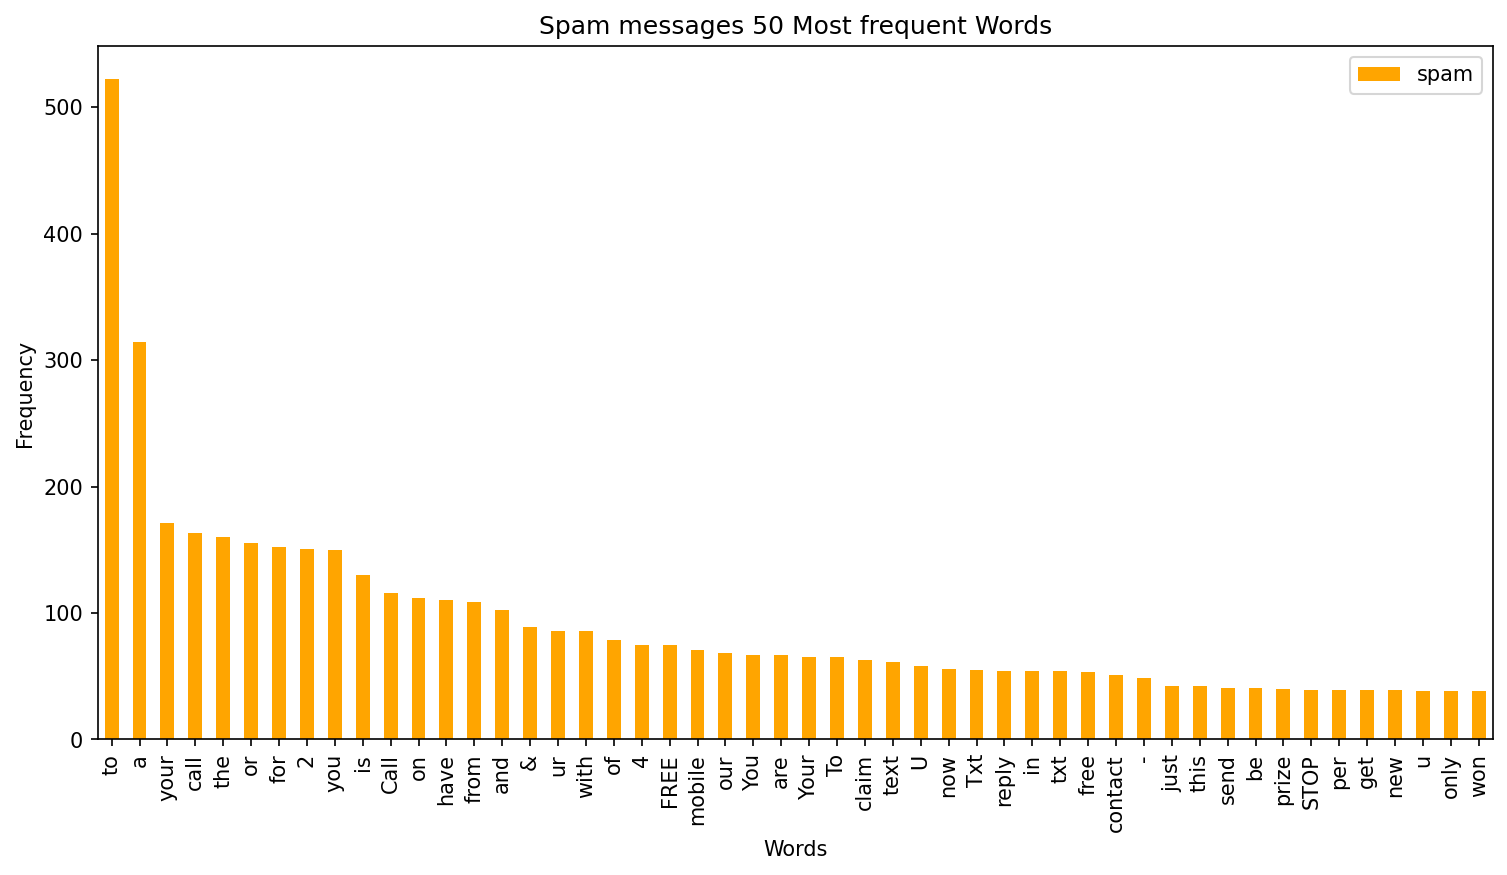

In [49]:
# lets see and visualize some most frequent words in spam messages
plt.figure(figsize=(12,6), dpi=150)
spam_series[:50].plot(kind='bar', label='spam', color='orange')
plt.title("Spam messages 50 Most frequent Words")
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()

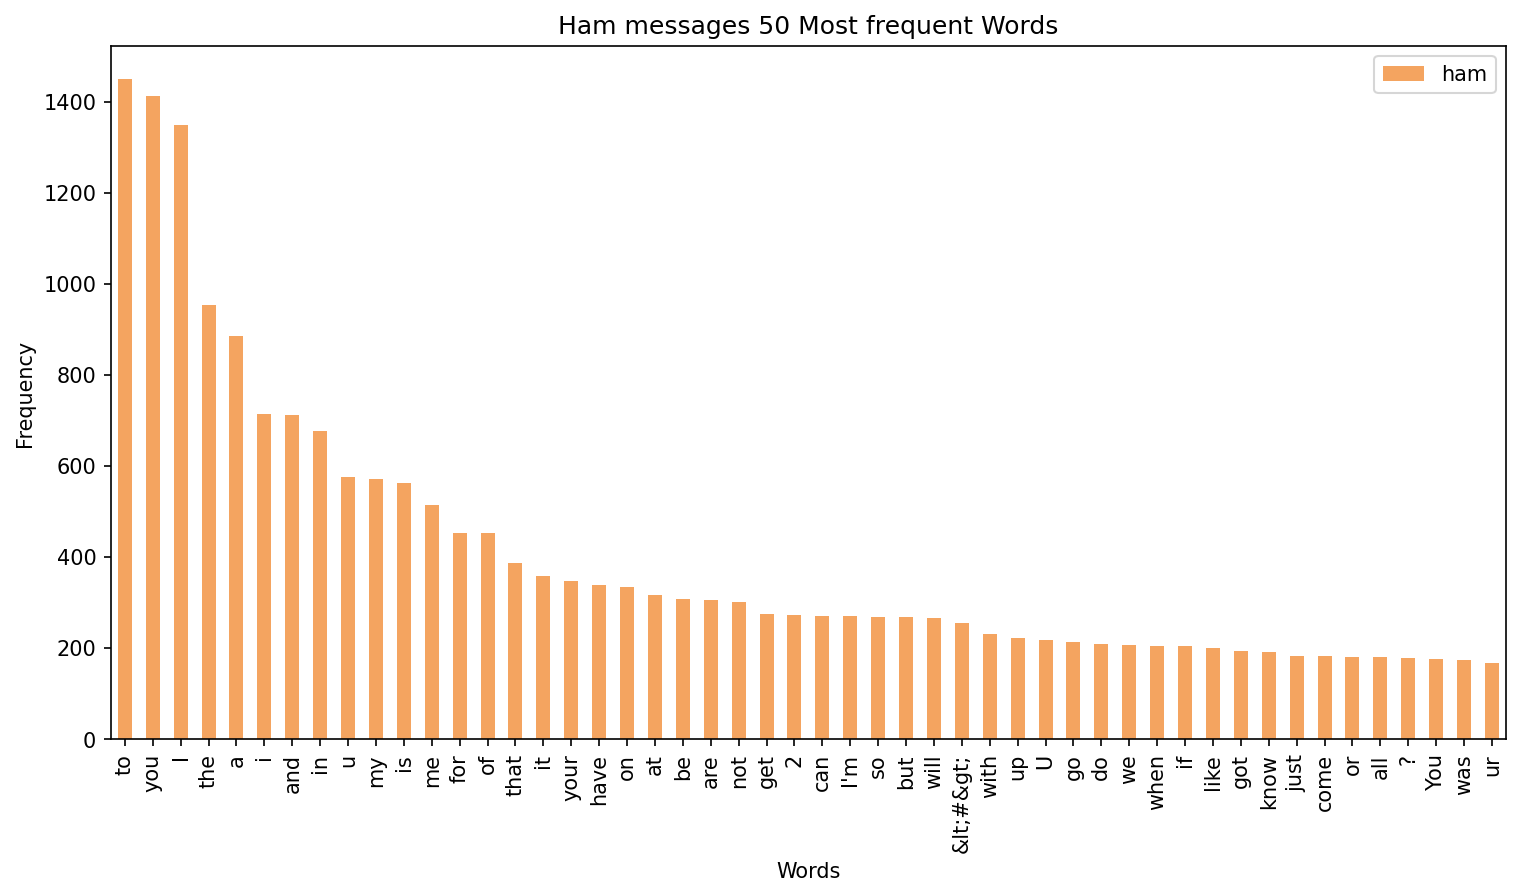

In [50]:
# lets see and visualize some most frequent words in ham messages
plt.figure(figsize=(12,6), dpi=150)
ham_series[:50].plot(kind='bar', label='ham', color='sandybrown')
plt.title("Ham messages 50 Most frequent Words")
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [51]:
## Save it future use

# %%writefile text_transformer.py
# import nltk
# from nltk.tokenize import word_tokenize
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# ps = PorterStemmer()
# import string

# stopwords_list = stopwords.words("english")
# # manualy created a list of stopwords
# ls = ['ur',"&lt;#&gt;", "...", "ÌÏ", ":)", "&amp;", "å£", "£"] + list(string.punctuation) + list(string.ascii_letters) + list(string.digits)
# stopwords_list += ls

# def txt_transformer(text):
#     # Lowercase the text
#     msg = text.lower()

#     # Tokenize the text
#     msg = nltk.word_tokenize(msg)

#     # Remove non-alphanumeric tokens, stopwords and punctuation
#     sentance = []
#     for i in msg:
#         if i.isalnum() and i not in stopwords_list:
#             # Stem the words and append to sentance list
#             sentance.append(ps.stem(i))
#     # join the sentance with an empty space and return
#     return " ".join(sentance)

In [147]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import string

stopwords_list = stopwords.words("english")
# manualy created a list of stopwords
ls = ['ur',"&lt;#&gt;", "...", "ÌÏ", ":)", "&amp;", "å£", "£"] + list(string.punctuation) + list(string.ascii_letters) + list(string.digits)
stopwords_list += ls

def txt_transformer(text):
    # Lowercase the text
    msg = text.lower()

    # Tokenize the text
    msg = nltk.word_tokenize(msg)

    # Remove non-alphanumeric tokens, stopwords and punctuation
    sentance = []
    for i in msg:
        if i.isalnum() and i not in stopwords_list:
            # Stem the words and append to sentance list
            sentance.append(ps.stem(i))
    # join the sentance with an empty space and return
    return " ".join(sentance)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amarprajapat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [171]:
print(f"Text before applying the function :- \n\n{data['message'][0]}")
print("-"*80)
print(f"Text after applying the function :- \n\n{txt_transformer(data['message'][0])}")

Text before applying the function :- 

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
--------------------------------------------------------------------------------
Text after applying the function :- 

go jurong point crazi avail bugi great world la buffet cine got amor wat


In [62]:
# creating a trasnformed_txt feature to store the trasnformed text
data['trasnformed_txt'] = data['message'].apply(txt_transformer)

In [63]:
data.describe()

,label,message,trasnformed_txt
count,5169,5169,5169
unique,2,5169,5082
top,ham,"Go until jurong point, crazy.. Available only ...",
freq,4516,1,15


In [64]:
data['trasnformed_txt'].duplicated().sum()

87

In [65]:
data.drop_duplicates(subset=["trasnformed_txt"], inplace=True, ignore_index=True)

In [66]:
data.head()

,label,message,trasnformed_txt
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi great world l...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt 21st...
3,ham,U dun say so early hor... U c already then say...,dun say earli hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [67]:
data.describe()

,label,message,trasnformed_txt
count,5082,5082,5082
unique,2,5082,5082
top,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi great world l...
freq,4458,1,1


In [68]:
# lets drop message column
data.drop(columns="message", inplace=True)

In [99]:
data

,label,trasnformed_txt
0,ham,go jurong point crazi avail bugi great world l...
1,ham,ok lar joke wif oni
2,spam,free entri wkli comp win fa cup final tkt 21st...
3,ham,dun say earli hor alreadi say
4,ham,nah think goe usf live around though
...,...,...
5077,spam,2nd time tri contact pound prize claim easi ca...
5078,ham,go esplanad fr home
5079,ham,piti mood suggest
5080,ham,guy bitch act like interest buy someth els nex...


In [100]:
spam_string = " ".join(data[data['label'] == 'spam']['trasnformed_txt'].values)
spam_string

'free entri wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate appli 08452810075over18 freemsg hey darl week word back like fun still tb ok xxx std chg send rcv winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour mobil 11 month entitl updat latest colour mobil camera free call mobil updat co free 08002986030 six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl info urgent week free membership prize jackpot txt word claim 81010 lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub use credit click wap link next txt messag click http england macedonia dont miss news txt nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq thank subscript rington uk mobil charg pleas confirm repli ye repli charg 07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow sm ac sptv new jersey devil detroit red wing play ice hockey c

In [101]:
ham_string = " ".join(data[data['label'] == 'ham']['trasnformed_txt'].values)
ham_string

'go jurong point crazi avail bugi great world la buffet cine got amor wat ok lar joke wif oni dun say earli hor alreadi say nah think goe usf live around though even brother like speak treat like aid patent per request mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun gon na home soon want talk stuff anymor tonight cri enough today search right word thank breather promis wont take help grant fulfil promis wonder bless time date sunday oh watch eh rememb spell name ye naughti make wet fine thatåõ way feel thatåõ way gota serious spell name go tri month ha ha joke pay first lar da stock comin aft finish lunch go str lor ard smth lor finish lunch alreadi ffffffffff alright way meet sooner forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol lol alway convinc catch bu fri egg make tea eat mom left dinner feel love back amp pack car let know room ahhh work vagu rememb feel like lol wait still clear sure sarcast want live us yeah

In [102]:
from wordcloud import WordCloud

In [103]:
wc = WordCloud(width=1400, height=1000, background_color='white')

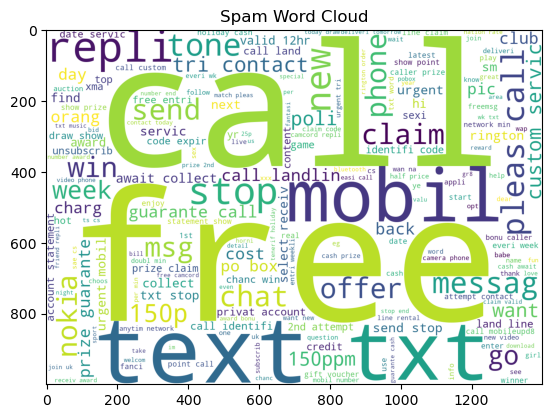

In [105]:
# lets create Spam Word Cloud
plt.imshow(wc.generate_from_text(spam_string))
plt.title("Spam Word Cloud")
plt.show()

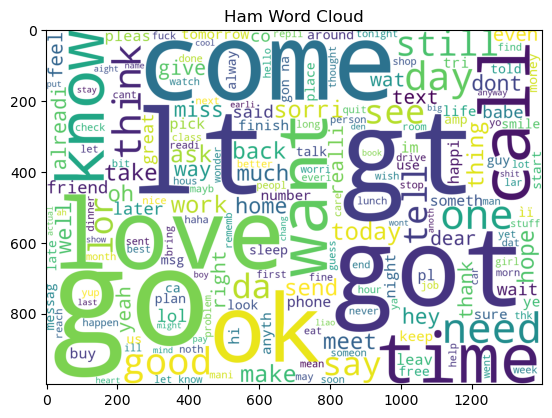

In [107]:
# lets create Ham Word Cloud
plt.imshow(wc.generate_from_text(ham_string))
plt.title("Ham Word Cloud")
plt.show()

In [61]:
data['label'].value_counts()

label
ham     4458
spam     624
Name: count, dtype: int64

In [63]:
# encode the categorical labels to numerical labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

In [64]:
data['label'].value_counts()

label
0    4458
1     624
Name: count, dtype: int64

        Ham  --->  0
        Spam  --->  1

In [65]:
y = data['label'].values
y

array([0, 0, 1, ..., 0, 0, 0])

## CountVectorizer

In [66]:
# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [67]:
count_vec = CountVectorizer()
X = count_vec.fit_transform(data['trasnformed_txt']).toarray()

In [68]:
X.shape

(5082, 6707)

In [69]:
# function to to Split the dataset in equal label ratio

from sklearn.model_selection import StratifiedShuffleSplit
def split_data(X, y, test_size=0.2, random_state=None):
    shuffle_split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)
    (train_idx, test_idx), = shuffle_split.split(X, y)
    X_train = X[train_idx]
    X_test = X[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]
    return X_train,X_test,y_train,y_test

In [70]:
X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.20, random_state=42)

In [71]:
print(f"Traning Ratio :\n{(pd.Series(y_train).value_counts()/y_train.size)*100}")
print()
print(f"Testing Ratio :\n{(pd.Series(y_test).value_counts()/y_test.size)*100}")

Traning Ratio :
0    87.724477
1    12.275523
Name: count, dtype: float64

Testing Ratio :
0    87.708948
1    12.291052
Name: count, dtype: float64


### Import Classification Model and Metrics

In [72]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [73]:
mnb = MultinomialNB()
rf = RandomForestClassifier()
svc = SVC()
knn = KNeighborsClassifier()

In [74]:
classification_models = {
    'MNB' : mnb,
    'RF' : rf,
    'SVC' : svc,
    'KNN' : knn
}

In [75]:
# creating a function to print Accuracy, Precision Score and Confusion Matrix
def classification_report(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train,y_hat_train)
    test_accuracy = accuracy_score(y_test,y_hat_test)
    train_precision = precision_score(y_train,y_hat_train)
    test_precision = precision_score(y_test,y_hat_test)
    
    print(f"Training Accuracy Score : {train_accuracy:.2f}")
    print(f"Testing Accuracy Score : {test_accuracy:.2f}")
    print()
    print(f"Training Precision Score : {train_precision:.2f}")
    print(f"Testing Precision Score : {test_precision:.2f}")
    print()
    print(f"Training Confusion Matrix:\n{confusion_matrix(y_train,y_hat_train)}")
    print()
    print(f"Testing Confusion Matrix:\n{confusion_matrix(y_test,y_hat_test)}")
    return train_accuracy, test_accuracy, train_precision, test_precision

In [76]:
classification_report(mnb, X_train, y_train, X_test, y_test)

Training Accuracy Score : 0.99
Testing Accuracy Score : 0.97

Training Precision Score : 0.97
Testing Precision Score : 0.88

Training Confusion Matrix:
[[3550   16]
 [  21  478]]

Testing Confusion Matrix:
[[876  16]
 [ 13 112]]


(0.9908979089790898, 0.9714847590953786, 0.9676113360323887, 0.875)

In [77]:
train_accuracy = []
test_accuracy = []
train_precision = []
test_precision = []
for name, model in classification_models.items():
    print(f"Model name :- {name}")
    tr_acc, te_acc, tr_prec, te_prec = classification_report(model, X_train, y_train, X_test, y_test)
    train_accuracy.append(tr_acc)
    test_accuracy.append(te_acc)
    train_precision.append(tr_prec)
    test_precision.append(te_prec)
    print("-"*80)

Model name :- MNB
Training Accuracy Score : 0.99
Testing Accuracy Score : 0.97

Training Precision Score : 0.97
Testing Precision Score : 0.88

Training Confusion Matrix:
[[3550   16]
 [  21  478]]

Testing Confusion Matrix:
[[876  16]
 [ 13 112]]
--------------------------------------------------------------------------------
Model name :- RF
Training Accuracy Score : 1.00
Testing Accuracy Score : 0.96

Training Precision Score : 1.00
Testing Precision Score : 1.00

Training Confusion Matrix:
[[3566    0]
 [   0  499]]

Testing Confusion Matrix:
[[892   0]
 [ 38  87]]
--------------------------------------------------------------------------------
Model name :- SVC
Training Accuracy Score : 1.00
Testing Accuracy Score : 0.96

Training Precision Score : 1.00
Testing Precision Score : 0.99

Training Confusion Matrix:
[[3566    0]
 [  18  481]]

Testing Confusion Matrix:
[[891   1]
 [ 39  86]]
--------------------------------------------------------------------------------
Model name :- 

In [78]:
# creating a DataFrame to compare Accuracy and Precision Score for Different Models
performance_report = pd.DataFrame({
    'Algorithm' : classification_models.keys(),
    'Training_Accuracy' : train_accuracy,
    'Test_Accuracy' : test_accuracy,
    'Training_Precision' : train_precision,
    'Test_Precision' : test_precision,
})

performance_report

,Algorithm,Training_Accuracy,Test_Accuracy,Training_Precision,Test_Precision
0,MNB,0.990898,0.971485,0.967611,0.875000
1,RF,1.000000,0.962635,1.000000,1.000000
2,SVC,0.995572,0.960669,1.000000,0.988506
3,KNN,0.926199,0.910521,1.000000,1.000000


### Best Model -> Random Forest Classifier
    A precision of 1.00 on both training and testing means:
    Every message that was predicted as Spam (1) was actually Spam — no false positives.
    This is excellent, especially for spam detection, because it means legitimate (Ham) messages are never incorrectly marked as Spam.

### Save the Model

In [1]:
# Save the CountVectorizer and RandomForestClassifier
import pickle
# pickle.dump(count_vec, open('vectorizer.pkl', 'wb'))
# pickle.dump(rf, open('model.pkl', 'wb'))

In [2]:
v = pickle.load(open('vectorizer.pkl', 'rb'))
m = pickle.load(open('model.pkl', 'rb'))

In [69]:
def detect_spam(email_text):
    text = txt_transformer(email_text)
    # import saved pickle file
    v = pickle.load(open('vectorizer.pkl', 'rb'))
    m = pickle.load(open('model.pkl', 'rb'))

    vec = v.transform([text])
    
    prediction = m.predict(vec)
    if prediction == 0:
        return "Ham(Not Spam)!"
    else:
        return "Spam"

In [ ]:
new_emails = [
    "congratulations you won 1000 call on this number to get your prize",     # Sample Spam text
    "I am free today, Let's go out for a movie. What do you say?",             # Sample Not Spam text
]
for i in new_emails:
    print(detect_spam(i))